In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Assumption of Regression Model :**
* Linearity: The relationship between dependent and independent variables should be linear.
* Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Reading the Dataset
df = pd.read_csv("/content/drive/MyDrive/DS&AI_bootcamp/mlr_data.csv")

In [ ]:
#create a dataframe that has the following features: Volume, Weight, CO2
df = df[['Volume', 'Weight', 'CO2']]

In [ ]:
df.head()

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105


In [ ]:
#Print the shape of the dataframe
df.shape

(36, 3)

In [ ]:
#Describe some stats of the dataframe
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [ ]:
#Setting the value for X (Weight, Volume) and Y (CO2)
X = df[['Weight', 'Volume']]
y = df['CO2']

**Checking for outliers**

<Axes: >

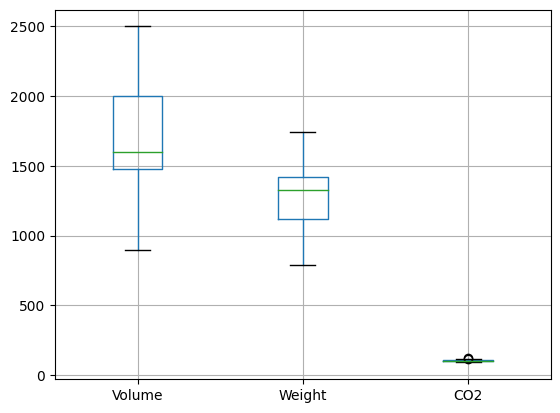

In [ ]:
#Generate box plots for volume and weight to check any outliers
df.boxplot()

# Exploratory Data Analysis

**Distribution of the target variable**

<ipython-input-25-dc472da3ba5a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CO2'])


<Axes: xlabel='CO2', ylabel='Density'>

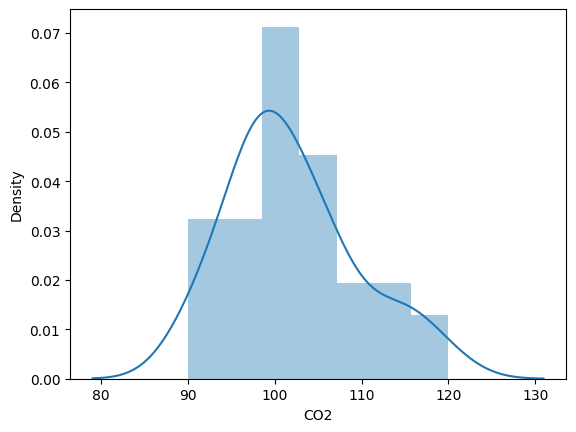

In [ ]:
#Generatre a distribution plot for CO2 feature
sns.distplot(df['CO2'])

**Conclusion:** It is normally distributed

**Relationship of CO2 with other variables**

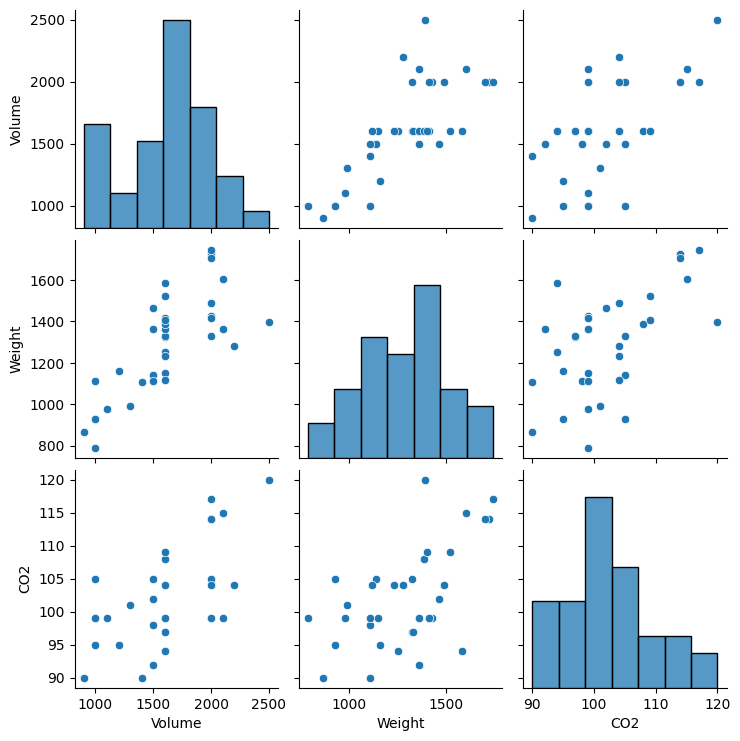

In [ ]:
#Generate pairplots for CO2 vs. Weight and CO2 vs. Volume to check if relationships are linear
sns.pairplot(df)

<Axes: >

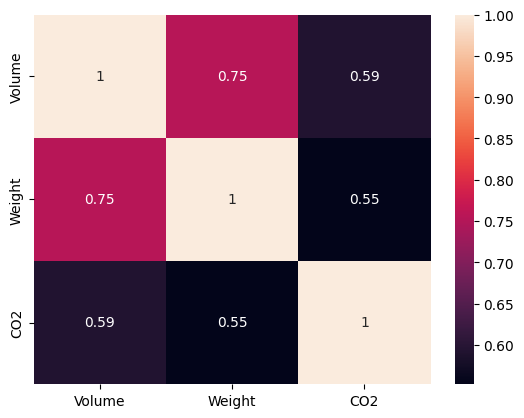

In [ ]:
# Create the correlation matrix and represent it as a heatmap.
corr = df.corr()
sns.heatmap(corr, annot=True)

# Model Building

**Splitting the dataset into train and test set**

In [ ]:
#Split the dataset into training of 70% and test of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Print the shape of y_train
y_train.shape

(25,)

In [ ]:
#Print the shape of y_test
y_test.shape

(11,)

In [ ]:
#Create an object reg_model of linear regression
reg_model = LinearRegression()

In [ ]:
#Fitting the Multiple Linear Regression model
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients
reg_model.coef_
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

[('Weight', 0.00720613145615111), ('Volume', 0.004820152824129132)]

In [ ]:
#Predicting the Test and Train set result
y_pred_train = reg_model.predict(X_train)
y_pred_test = reg_model.predict(X_test)

In [ ]:
#Print the predictions as dataframe
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

,Actual,Predicted
35,120,106.690781
13,94,101.322166
26,104,104.965287
30,115,106.276007
16,99,102.136459
31,117,106.810057
21,99,104.518507
12,99,97.421216
8,98,99.831293
17,104,104.416030


In [ ]:
#Print Actual value y_test and the predicted value y_pred in a df
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df_compare

,Actual,Predicted
35,120,106.690781
13,94,101.322166
26,104,104.965287
30,115,106.276007
16,99,102.136459
31,117,106.810057
21,99,104.518507
12,99,97.421216
8,98,99.831293
17,104,104.416030


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("Mean absolute error (MAE):", mae)
print("Mean squared error (MSE):", mse)
print("Root mean squared error (RMSE):", rmse)


Mean absolute error (MAE): 4.96171109407186
Mean squared error (MSE): 41.85943595384499
Root mean squared error (RMSE): 6.469886857885923
